In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# 1/ Load data

In [2]:
data = np.genfromtxt("DATA/MNIST/mnist_train.csv",delimiter=',')
data.shape

(6000, 785)

# 2/ EDA

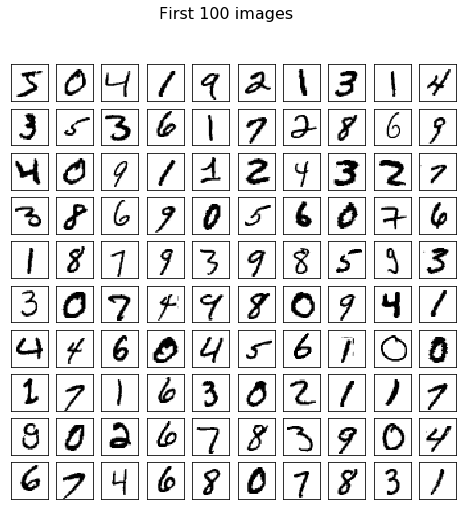

In [3]:
X = data[:,1:]
y = data[:,0]

plt.figure(figsize=(8, 8))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(X[i].reshape((28, 28)), cmap=plt.cm.gray_r)
    plt.xticks(())
    plt.yticks(())
plt.suptitle('First 100 images', fontsize=16)
plt.show()


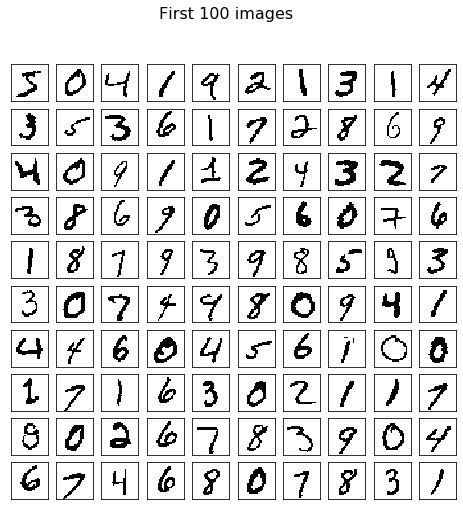

In [4]:
# Scale images to 0-1 range, and make pixels binary(only either 0 or 1)
X = X/255.
X = (X>0.5).astype(float)

plt.figure(figsize=(8, 8))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(X[i].reshape((28, 28)), cmap=plt.cm.gray_r)
    plt.xticks(())
    plt.yticks(())
plt.suptitle('First 100 images', fontsize=16)
plt.show()

# 3/Pipeline

## Selecting a Baseline Model for Classification problem

In [5]:
import pandas as pd
import sys
sys.path.insert(1,'E:\DUY\DS\deeplearning\CustomTools')
import ultility_tools as utt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
models ={"model_name": ["Logistic Regression",
                        "Native Bayes"],
         "model_command": [LogisticRegression(),
                           GaussianNB()],
         "model_params": [{'C':[1e-1, 1e0, 1e1, 1e2], 'penalty':['l1', 'l2']},
                          {}]
         }

best_grid, df_models_results = utt.get_all_best_models(models, X, y)
df_models_results

,model_name,best_score,best_params,fit_time,score_time
0,Logistic Regression,0.898333,"{'C': 0.1, 'penalty': 'l2'}",0.362981,0.001146
1,Native Bayes,0.572167,{},0.071808,0.102127


## 3.1/ PCA + LogisticRegression

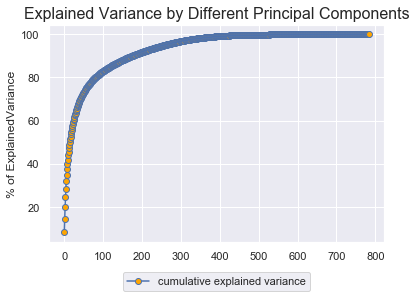

In [6]:
# import Principal Components Analysis module
from sklearn.decomposition import PCA

pca = PCA(n_components=784)
pca.fit(X)
pca_percent = pca.explained_variance_ratio_*100
fig = plt.figure()
plt.plot(np.cumsum(pca_percent),marker='o',markerfacecolor='orange',label='cumulative explained variance')
plt.title('Explained Variance by Different Principal Components',fontsize=16)
plt.ylabel('% of ExplainedVariance')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25))
plt.show()


In [8]:
import sys
sys.path.insert(1,'E:\DUY\DS\deeplearning\CustomTools')
import ultility_tools as utt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

pca_lr = Pipeline([("pca",PCA()),
                   ("lr",LogisticRegression())])
pca_lr_params = {"pca__n_components":[100],
                 "lr__C":[0.1,1.0,10.]}
utt.get_best_for_model(pca_lr,pca_lr_params,X,y)


************************************************
Best Accuracy: 0.8998333333333333
Best Parameters: {'lr__C': 0.1, 'pca__n_components': 100}
Average Time to Fit: 0.407 (s)
Average Time to Score: 0.007 (s)
************************************************


GridSearchCV(cv=None, error_score=0.0,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('lr',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                       

## 3.2/ SBM + LogisticRegression

In [9]:
from sklearn.neural_network import BernoulliRBM
rbm_lr = Pipeline([("rbm",BernoulliRBM(random_state=0)),
                   ("lr",LogisticRegression())])
rbm_lr_params = {"rbm__n_components":[10,100,200],
                 "lr__C":[0.1,1.0,10.]}
grid2 = utt.get_best_for_model(rbm_lr,rbm_lr_params,X,y)






************************************************
Best Accuracy: 0.9231666666666666
Best Parameters: {'lr__C': 1.0, 'rbm__n_components': 200}
Average Time to Fit: 5.437 (s)
Average Time to Score: 0.005 (s)
************************************************
